Lending Club Case Study: The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

# Reading the training data set
loans = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan.csv')
loans.head()

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
#creating a copy before making any changes
loan = loans.copy()

In [ ]:
#shape of dataframe
print(loan.shape)

(39717, 111)


In [ ]:
#checking all column names
print(loan.columns.to_list())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

#Data Cleaning

In [ ]:
#total sum of null values in a column
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [ ]:
loan.isnull().sum().sort_values(ascending=False).head(60)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [ ]:
#selecting columns with all null values
delete_columns = loan.isnull().sum().sort_values(ascending=False).head(58).index.to_list()
print(delete_columns)

['verification_status_joint', 'annual_inc_joint', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'bc_util', 'bc_open_to_buy', 'avg_cur_bal', 'acc_open_past_24mths', 'inq_last_12m', 'total_cu_tl', 'inq_fi', 'total_rev_hi_lim', 'all_util', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'open_il_12m', 'open_il_6m', 'open_acc_6m', 'tot_cur_bal', 'tot_coll_amt', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'num_rev_tl_bal_gt_0', 'total_bc_limit', 'total_bal_ex_mort', 'tot_hi_cred_lim', 'percent_bc_gt_75', 'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'num_tl_120dpd_2m', 'num_sats', 'num_rev_accts', 'mths_since_recent_bc', 'num_op_rev_tl', 'num_il_tl', 'num_bc_tl', 'num_bc_sats', 'num_actv_rev_tl', 'num_actv_bc_tl', 'num_accts_ever_120_pd', 'mths_since_recent_revol_delinq', 'mths_since_recent_inq', 'mths_since_recent_bc_dlq', 'dti_joint', 'total_il_high_credit_limit', 'mths_since_last_major_

In [ ]:
#deleting columns with all null values

loan = loan.drop(delete_columns, axis=1)
print(loan.shape)

(39717, 53)


In [ ]:
#rechecking null values
loan.isnull().sum().sort_values(ascending=False).head(15)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
tax_liens                       39
title                           11
last_credit_pull_d               2
total_rec_prncp                  0
out_prncp                        0
initial_list_status              0
out_prncp_inv                    0
total_acc                        0
dtype: int64

In [ ]:
#Details for employment title which has 2459 null values
loan['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [ ]:
#Details for employement length which has 1075 null values
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [ ]:
# missing values in a row greater than 5
(loan.isnull().sum(axis=1) > 5).sum()

0

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
#loan interest rate (dtype == object)
loan['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [ ]:
#converting interest rate to float
loan["int_rate"] = loan["int_rate"].apply(lambda x: x.replace('%', '')).astype('float64')

loan["int_rate"].dtype

dtype('float64')

In [ ]:
loan['term'].value_counts()

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [ ]:
#strip 'months' and convert the column to 'int32
loan['term'] = loan['term'].apply(lambda x: x[:3]).astype("int32")

loan['term'].dtype

dtype('int32')

In [ ]:
#renaming column for a better reference
loan.rename(columns = {"term" : "term_months"}, inplace=True)

In [ ]:
loan["emp_length"].isnull().sum()

1075

In [ ]:
# dropping the missing values from the column (otherwise the replace code below throws error)
loan = loan[~loan['emp_length'].isnull()]

In [ ]:
#converting emp_length from object to integers by replacing string characters
loan['emp_length'] = loan['emp_length'].apply(lambda x: x.replace('+', '').replace('years', '').replace('year', '').replace('<', '').replace(' ', '')).astype('int32')

loan['emp_length'].value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [ ]:
loan = loan[~loan['revol_util'].isnull()]

In [ ]:
loan['revol_util'] = loan['revol_util'].apply(lambda x: x.replace('%', ''))

In [ ]:
loan['revol_util'] = loan.revol_util.astype('float64')

In [ ]:
loan.shape

(38595, 53)

In [ ]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term_months', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [ ]:
#removing columns that are generated after the loan approval which are irrelevant for our objective
loan.drop(['url', 'zip_code', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'policy_code'], axis=1, inplace=True)

In [ ]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_months,int_rate,installment,grade,sub_grade,...,pub_rec,revol_bal,revol_util,total_acc,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0,13648,83.7,9,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0,1687,9.4,4,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0,2956,98.5,10,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0,5598,21.0,37,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0,27783,53.9,38,INDIVIDUAL,0,0.0,0,0.0,0.0


In [ ]:
#checking all columns data
loan.application_type.value_counts()

INDIVIDUAL    38595
Name: application_type, dtype: int64

In [ ]:
loan['pymnt_plan'].value_counts()

n    38595
Name: pymnt_plan, dtype: int64

In [ ]:
loan.chargeoff_within_12_mths.value_counts()

0.0    38539
Name: chargeoff_within_12_mths, dtype: int64

In [ ]:
loan.acc_now_delinq.value_counts()

0    38595
Name: acc_now_delinq, dtype: int64

In [ ]:
loan.tax_liens.value_counts()

0.0    38556
Name: tax_liens, dtype: int64

In [ ]:
loan.delinq_amnt.value_counts()

0    38595
Name: delinq_amnt, dtype: int64

In [ ]:
#removing all columns with just 1 value
loan.drop(['pymnt_plan','application_type', 'chargeoff_within_12_mths', 'acc_now_delinq', 'delinq_amnt', 'tax_liens'], axis=1, inplace=True)

In [ ]:
loan.earliest_cr_line.value_counts().head()

Nov-98    365
Oct-99    361
Dec-98    340
Oct-00    336
Dec-97    318
Name: earliest_cr_line, dtype: int64

In [ ]:
#selecting only years from earliest credit line columns
from datetime import datetime
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'], format="%b-%y")
loan['earliest_cr_line'] = pd.DatetimeIndex(loan['earliest_cr_line']).year

In [ ]:
loan.issue_d.value_counts().head()

Dec-11    2207
Nov-11    2123
Oct-11    2027
Sep-11    1985
Aug-11    1873
Name: issue_d, dtype: int64

In [ ]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['issue_d'] = pd.DatetimeIndex(loan['issue_d']).year

In [ ]:
loan.issue_d.value_counts()

2011    20892
2010    11196
2009     4702
2008     1554
2007      251
Name: issue_d, dtype: int64

In [ ]:
#setting index
loan.set_index('id', inplace=True)
loan.drop(['member_id', 'addr_state'], axis=1, inplace=True)

In [ ]:
#removed 85 irrelevant columns
loan.shape

(38595, 27)

In [ ]:
#default rate
loan.loan_status.value_counts()

Fully Paid     32113
Charged Off     5384
Current         1098
Name: loan_status, dtype: int64

In [ ]:
# filtering only fully paid or charged-off
loan = loan[loan['loan_status'] != 'Current']

# convert to 0 and 1 for fully paid and charged off respectively
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x =='Fully Paid' else 1)

In [ ]:
loan['loan_status'].value_counts()

0    32113
1     5384
Name: loan_status, dtype: int64

In [ ]:
#Average loan default rate
loan['loan_status'].mean()

0.14358482011894286

#Univariate Analysis

In [ ]:
#function to plot loan_status across categorical variables
def bar_plot(x_var, y_var):
    sns.barplot(x=x_var, y=y_var, data=loan)
    sns.set_palette('RdBu', 10)
    plt.ylabel('Default Rate')

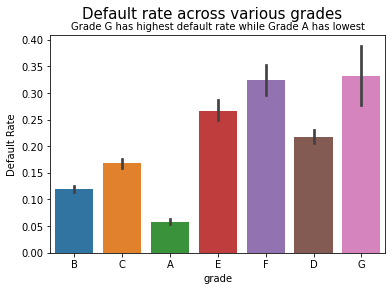

In [ ]:
#default rates across grade of the loan
bar_plot('grade', 'loan_status')
plt.suptitle('Default rate across various grades', size=15)
plt.title('Grade G has highest default rate while Grade A has lowest', size=10)
plt.show()

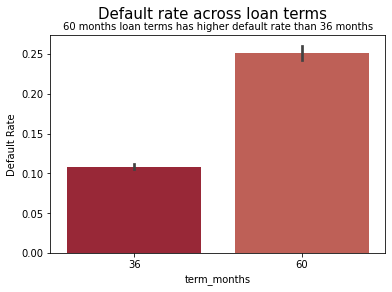

In [ ]:
#default rate across 36 months and 60 months
bar_plot('term_months', 'loan_status')
plt.suptitle('Default rate across loan terms', size=15)
plt.title('60 months loan terms has higher default rate than 36 months', size=10)
plt.show()

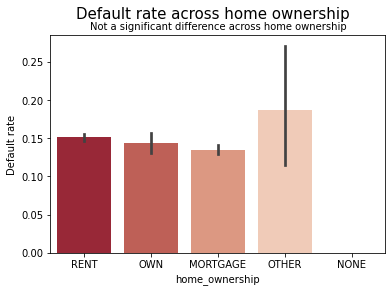

In [ ]:
#default rate based on house status
bar_plot('home_ownership', 'loan_status')
plt.suptitle('Default rate across home ownership', size=15)
plt.title('Not a significant difference across home ownership', size=10)
plt.ylabel('Default rate')
plt.show()


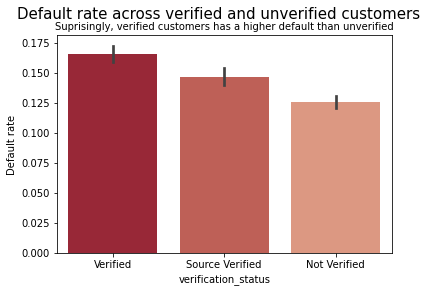

In [ ]:
#default rate based on verification status
bar_plot('verification_status', 'loan_status')
plt.suptitle('Default rate across verified and unverified customers', size=15)
plt.title('Suprisingly, verified customers has a higher default than unverified', size=10)
plt.ylabel('Default rate')
plt.show()

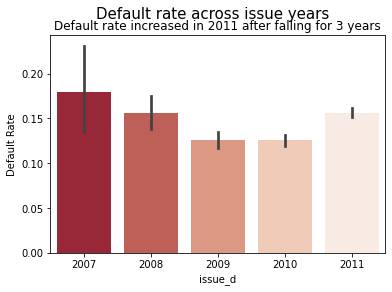

In [ ]:
#default rate across years
bar_plot('issue_d', 'loan_status')
plt.suptitle('Default rate across issue years', size=15)
plt.title('Default rate increased in 2011 after falling for 3 years')
plt.show()

In [ ]:
#loan columns (for reference)
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

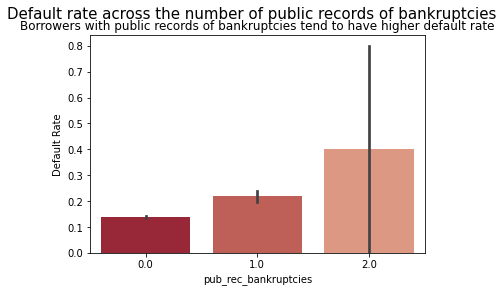

In [ ]:
#Default rate across the number of public records of bankruptcies
bar_plot('pub_rec_bankruptcies', 'loan_status')
plt.suptitle('Default rate across the number of public records of bankruptcies', size=15)
plt.title('Borrowers with public records of bankruptcies tend to have higher default rate')
plt.show()

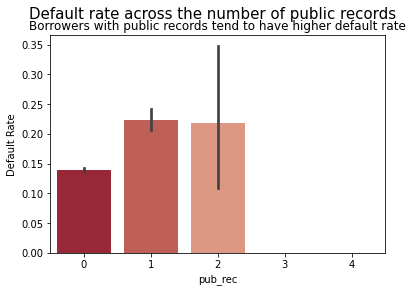

In [ ]:
#default rate across the number of public records
bar_plot('pub_rec', 'loan_status')
plt.suptitle('Default rate across the number of public records', size=15)
plt.title('Borrowers with public records tend to have higher default rate')
plt.show()

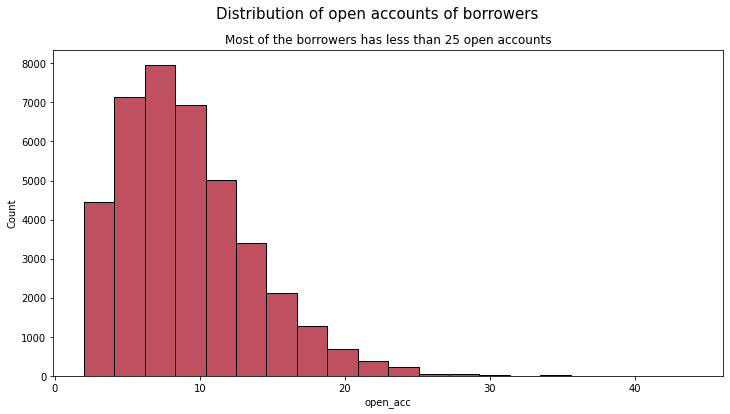

In [ ]:
#distribution of open accounts of borrowers
plt.figure(figsize=(12,6))
sns.histplot(data=loans, x = loans['open_acc'], bins=20)
plt.suptitle('Distribution of open accounts of borrowers', size=15)
plt.title('Most of the borrowers has less than 25 open accounts')
plt.show()

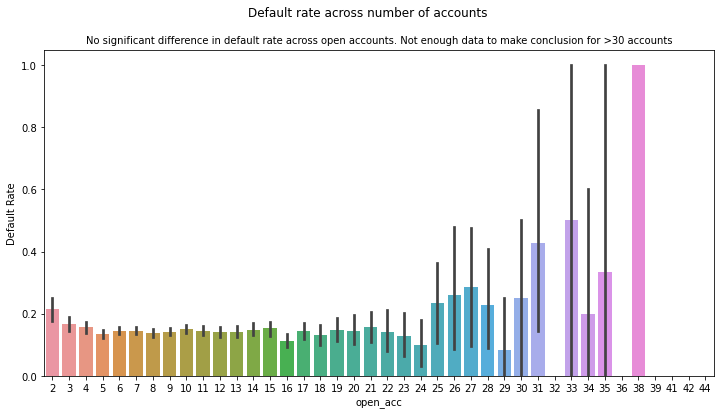

In [ ]:
#Default rate across number of accounts
plt.figure(figsize=(12,6))
bar_plot('open_acc', 'loan_status')
plt.suptitle('Default rate across number of accounts')
plt.title('No significant difference in default rate across open accounts. Not enough data to make conclusion for >30 accounts', size=10)
plt.show()

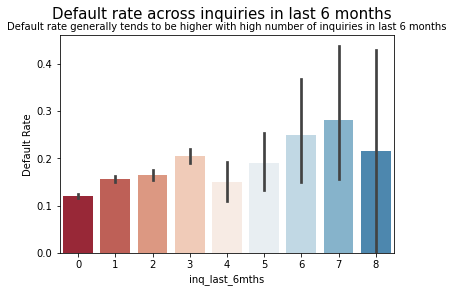

In [ ]:
#default rate vs inquiries in last 6 mnths
bar_plot('inq_last_6mths','loan_status')
plt.suptitle('Default rate across inquiries in last 6 months', size=15)
plt.title('Default rate generally tends to be higher with high number of inquiries in last 6 months', size=10)
plt.show()

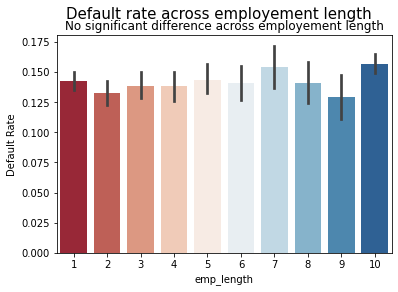

In [ ]:
#default rate across the length of employement
bar_plot('emp_length', 'loan_status')
plt.suptitle('Default rate across employement length', size=15)
plt.title('No significant difference across employement length')
plt.show()

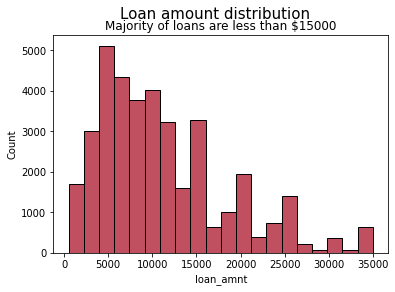

In [ ]:
#Distribution of loan amount
sns.histplot(loan['loan_amnt'], bins=20)
plt.suptitle('Loan amount distribution', size=15)
plt.title('Majority of loans are less than $15000')
plt.show()

In [ ]:
#Categorize the loan amount variable into very small, small, medium, high, very high categories to analyse how default rates vary
def loan_amount(n):
  if n < 5000:
    return 'very small'
  elif n >=5000 and n < 10000:
    return 'small'
  elif n >= 10000 and n < 20000:
    return 'medium'
  elif n >=20000 and n < 30000:
    return 'high'
  else:
    return 'very high'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_amount(x))


In [ ]:
#loan amount after categorizing them
loan['loan_amnt'].value_counts()

medium        11993
small          9872
very small     5529
high           4413
very high      1019
Name: loan_amnt, dtype: int64

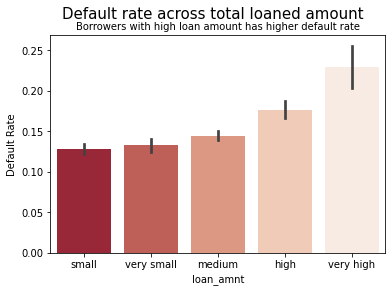

In [ ]:
#Default rate across total loaned amount
bar_plot('loan_amnt', 'loan_status')
plt.suptitle('Default rate across total loaned amount', size=15)
plt.title('Borrowers with high loan amount has higher default rate', size=10)
plt.show()

In [ ]:
# categorize debt to income ratio
def dti(n):
  if n <= 5:
    return ' very low'
  elif n > 5 and n <= 10:
    return 'low'
  elif n > 10 and n <= 20:
    return 'medium'
  elif n > 20 and n <= 25 :
    return 'high'
  else:
    return 'very high'
    

loan['dti'] = loan['dti'].apply(lambda x: dti(x))

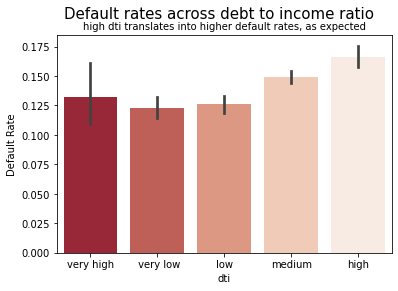

In [ ]:
#default rates across debt to income ratio

bar_plot('dti', 'loan_status')
plt.suptitle("Default rates across debt to income ratio", size=15)
plt.title('high dti translates into higher default rates, as expected', size=10)
plt.show()

In [ ]:
# installment
def installment(n):
  if n <= 150:
    return ' very low'
  elif n > 150 and n <=300:
    return 'low'
  elif n > 300 and n <=450:
    return 'medium'
  elif n > 450 and n <=600:
    return 'high'
  else:
    return 'very high'
    
loan['installment'] = loan['installment'].apply(lambda x: installment(x))

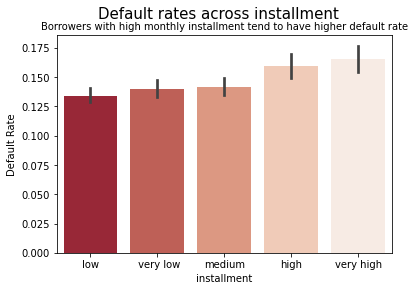

In [ ]:
#comparing default rates across installment
bar_plot('installment', 'loan_status')
plt.suptitle("Default rates across installment", size=15)
plt.title("Borrowers with high monthly installment tend to have higher default rate", size=10)
plt.show()

In [ ]:
#categorize revolving utlization
def revol_util(n):
    if n <= 20:
        return 'very low'
    elif n > 20 and n <=40:
        return 'low'
    elif n > 40 and n <=60:
       return 'medium'
    elif n > 60 and n <=80:
        return 'high'
    else:
        return 'very high'

loan['revol_util'] = loan['revol_util'].apply(lambda x: revol_util(x))

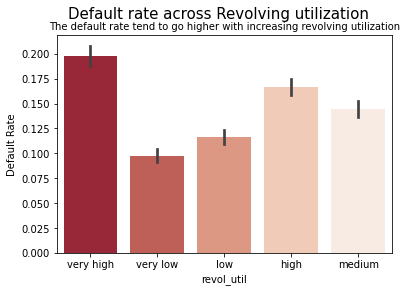

In [ ]:
#Default rate across Revolving utilization
bar_plot('revol_util', 'loan_status')
plt.suptitle("Default rate across Revolving utilization", size=15)
plt.title("The default rate tend to go higher with increasing revolving utilization", size=10)
plt.show()

In [ ]:
# categorize annual income
def annual_income(n):
    if n <= 40000:
        return 'very low'
    elif n > 40000 and n <=60000:
        return 'low'
    elif n > 60000 and n <=100000:
       return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

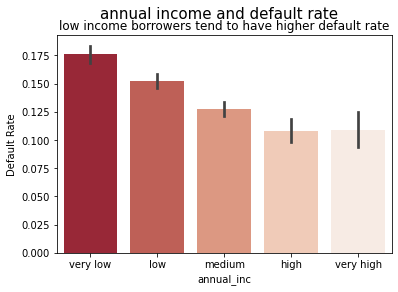

In [ ]:
# default rate across annual income
bar_plot('annual_inc', 'loan_status')
plt.suptitle("annual income and default rate", size=15)
plt.title('low income borrowers tend to have higher default rate')
plt.show()

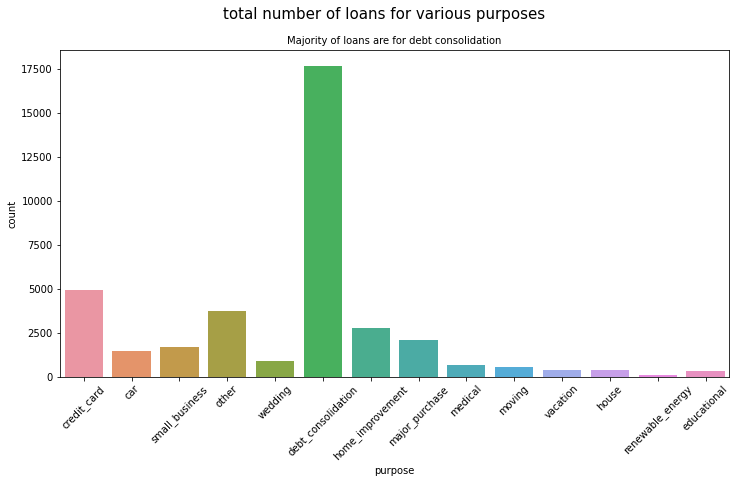

In [ ]:
#total number of loans for various purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=loan)
plt.xticks(rotation=45)
plt.suptitle("total number of loans for various purposes", size=15)
plt.title("Majority of loans are for debt consolidation", size=10)
plt.show()

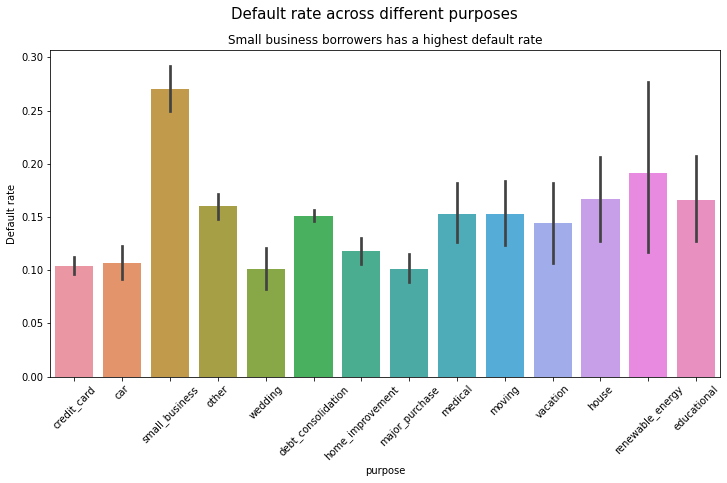

In [ ]:
#purpose - small business loans defualt the most, then renewable energy and education, x = 'purpose' and y = 'loan_Status'
plt.figure(figsize=(12, 6))
bar_plot('purpose', 'loan_status')
plt.xticks(rotation=45)
plt.ylabel('Default rate')
plt.suptitle('Default rate across different purposes', size=15)
plt.title('Small business borrowers has a highest default rate')
plt.show()

#Bivariate Analysis

In [ ]:
# filtering the dataframe for the top 6 purpose of loans
top_purposes = ["credit_card","small_business", "other", "debt_consolidation","home_improvement","major_purchase"]
loan = loan[loan['purpose'].isin(top_purposes)]
loan['purpose'].value_counts()

debt_consolidation    17664
credit_card            4897
other                  3700
home_improvement       2782
major_purchase         2074
small_business         1709
Name: purpose, dtype: int64

In [ ]:
#loan columns (for reference)
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term_months',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

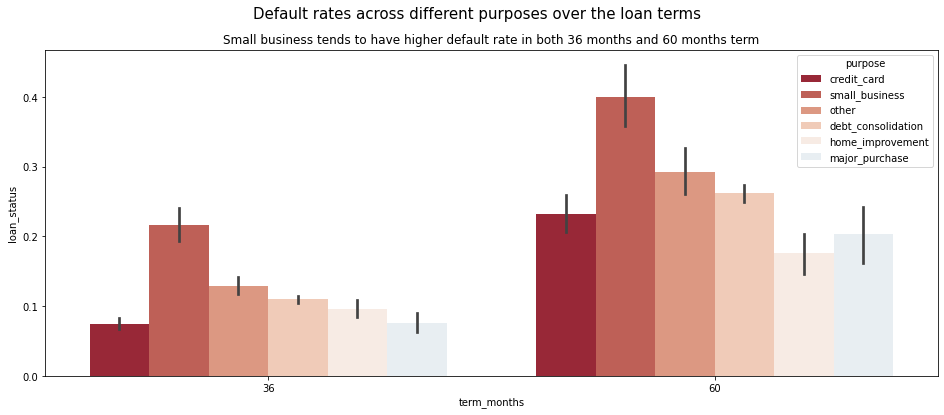

In [ ]:
# compare the default rates across different purposes over the loan terms
plt.figure(figsize=(16, 6))
sns.barplot(x='term_months', y="loan_status", hue='purpose', data=loan)
plt.suptitle("Default rates across different purposes over the loan terms", size=15)
plt.title("Small business tends to have higher default rate in both 36 months and 60 months term")
plt.show()

In [ ]:
#defining a function to plot segmented bar plots
def plot_segmented(x_axis):
    plt.figure(figsize = (16,6))
    sns.barplot(x=x_axis, y='loan_status', hue='purpose', data=loan)

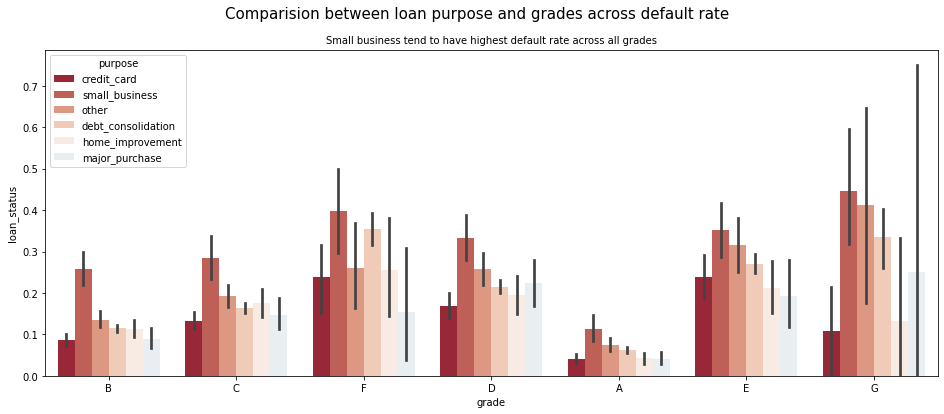

In [ ]:
#comparison between loan purpose and grades across default rate
plot_segmented('grade')
plt.suptitle("Comparision between loan purpose and grades across default rate", size=15)
plt.title("Small business tend to have highest default rate across all grades", size=10)
plt.show()

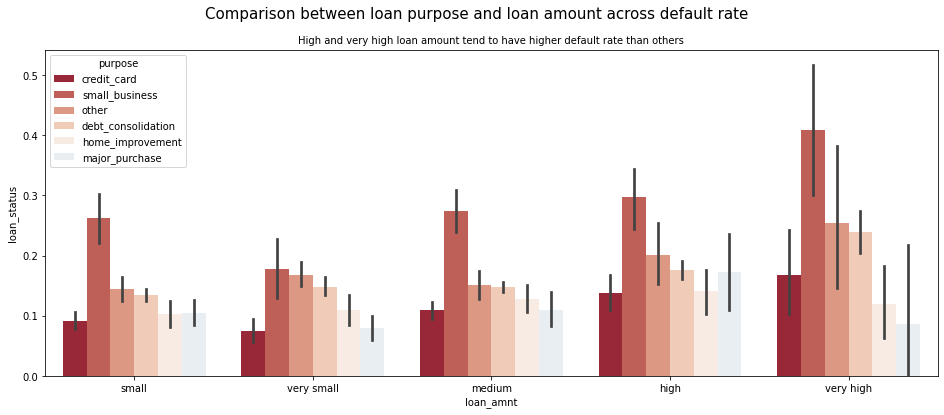

In [ ]:
#comparison between loan purpose and loan amount across default rate
plot_segmented('loan_amnt')
plt.suptitle("Comparison between loan purpose and loan amount across default rate", size=15)
plt.title("High and very high loan amount tend to have higher default rate than others", size=10)
plt.show()

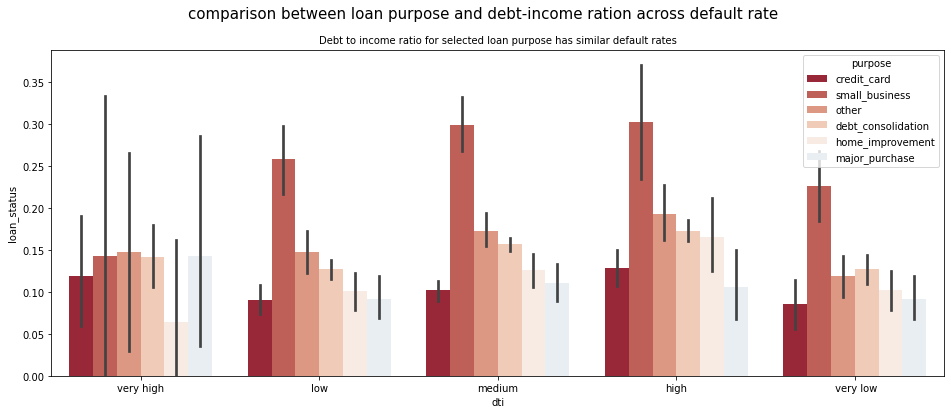

In [ ]:
#comparison between loan purpose and debt-income ration across default rate
plot_segmented('dti')
plt.suptitle("comparison between loan purpose and debt-income ration across default rate", size=15)
plt.title("Debt to income ratio for selected loan purpose has similar default rates", size=10)
plt.show()

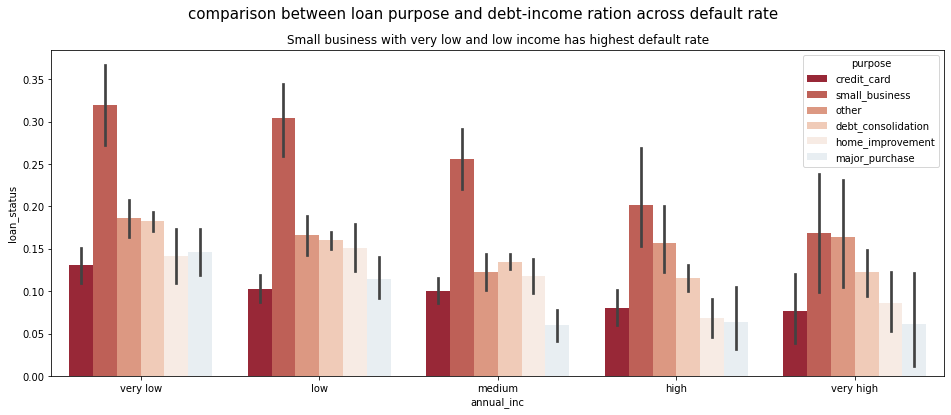

In [ ]:
#comparison between loan purpose and annual income across default rate
plot_segmented('annual_inc')
plt.suptitle("comparison between loan purpose and debt-income ration across default rate", size=15)
plt.title("Small business with very low and low income has highest default rate")
plt.show()

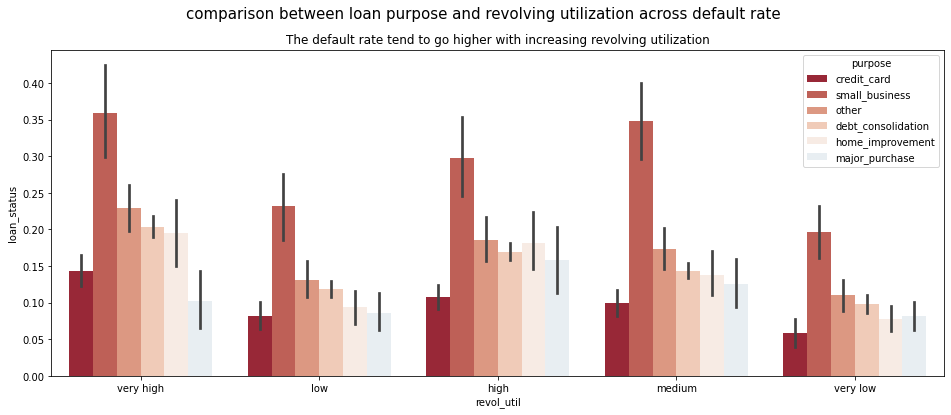

In [ ]:
#comparison between loan purpose and revolving utilization across default rate
plot_segmented('revol_util')
plt.suptitle("comparison between loan purpose and revolving utilization across default rate", size=15)
plt.title("The default rate tend to go higher with increasing revolving utilization")
plt.show()

#Default Rates

In [ ]:
# filtering all the object type variables
df_categorical = loan.loc[:, loan.dtypes == object]
df_categorical.columns

Index(['loan_amnt', 'installment', 'grade', 'sub_grade', 'emp_title',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'title', 'dti', 'revol_util'],
      dtype='object')

In [ ]:
#Defining a function to compare the effect of the categorical variable on default rate
def diff_rate(cat_var):
    default_rates = loan.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    print(round(default_rates, 2))
    print('The difference between the highest and the lowest default rate is :', round(default_rates[0] - default_rates[-1], 2))

In [ ]:
# filtering all the object type variables
df_categorical = loan.loc[:, loan.dtypes == object]
df_categorical.columns

Index(['loan_amnt', 'installment', 'grade', 'sub_grade', 'emp_title',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'title', 'dti', 'revol_util'],
      dtype='object')

In [ ]:
#selecting the columns of interest

df_categorical = ['loan_amnt', 'installment', 'grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti']

In [ ]:
# default rates across various categories
for i in df_categorical:

  print(diff_rate(i), '-----------------------')

loan_amnt
very high     0.23
high          0.18
medium        0.15
very small    0.13
small         0.13
Name: loan_status, dtype: float64
The difference between the highest and the lowest default rate is : 0.1
None -----------------------
installment
very high    0.17
high         0.16
medium       0.14
 very low    0.14
low          0.14
Name: loan_status, dtype: float64
The difference between the highest and the lowest default rate is : 0.03
None -----------------------
grade
F    0.33
G    0.32
E    0.27
D    0.22
C    0.17
B    0.12
A    0.06
Name: loan_status, dtype: float64
The difference between the highest and the lowest default rate is : 0.27
None -----------------------
home_ownership
OTHER       0.19
RENT        0.15
OWN         0.15
MORTGAGE    0.14
NONE        0.00
Name: loan_status, dtype: float64
The difference between the highest and the lowest default rate is : 0.19
None -----------------------
annual_inc
very low     0.18
low          0.16
medium       0.13
very high

###Summary of default rates
<br>- The grades, purpose, loan amount has a significant difference of 10% or more on highest and lowest default rate 
<br>- The annual income has a difference of 7% on highest and lowest default rate
<br>- The verification status, debt to income ratio, and installment payment has a 5% or less difference on highest and lowest default rate

#RECOMMENDATIONS
<br>•Applications  with higher amounts of loans (> $15000) should be thoroughly reviewed.
<br>•Applications with purpose of loans as 'debt consolidation’ should be closely looked before approving their loan application.
<br>•Lending club should stop approving loans for ‘Small businesses’ as there are very high number of defaulters with small businesses.
<br>•While providing loans for term 60 months the club should do a good background check of the applicants.
<br>•Public record should be checked for all borrowers because the borrower with public record of bankruptcies have higher tendency of defaulting.
<br>•It is believed that the large number of open account tend to have higher default rate. However, our analysis did not show significant differences. There are not enough borrowers with >30 open bank accounts to conclude anything about them.
<br>•Low grade loans have high tendency to default. Lending club should examine other information such as purpose, debt to income ratio, employment before issuing loans to Low grade (G to A).
<br>•Loans having higher interest rate have more defaulters. Check the background of applicant thoroughly before calculating interest rates.